In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

In [120]:
df = pd.read_csv(r"C:\Users\saran\Documents\BankChurners.csv")

In [121]:
df.shape

(10127, 23)

In [122]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


##### CHECKING NULL VALUES

In [123]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

##### there is not any missning values

##### checking the distribution

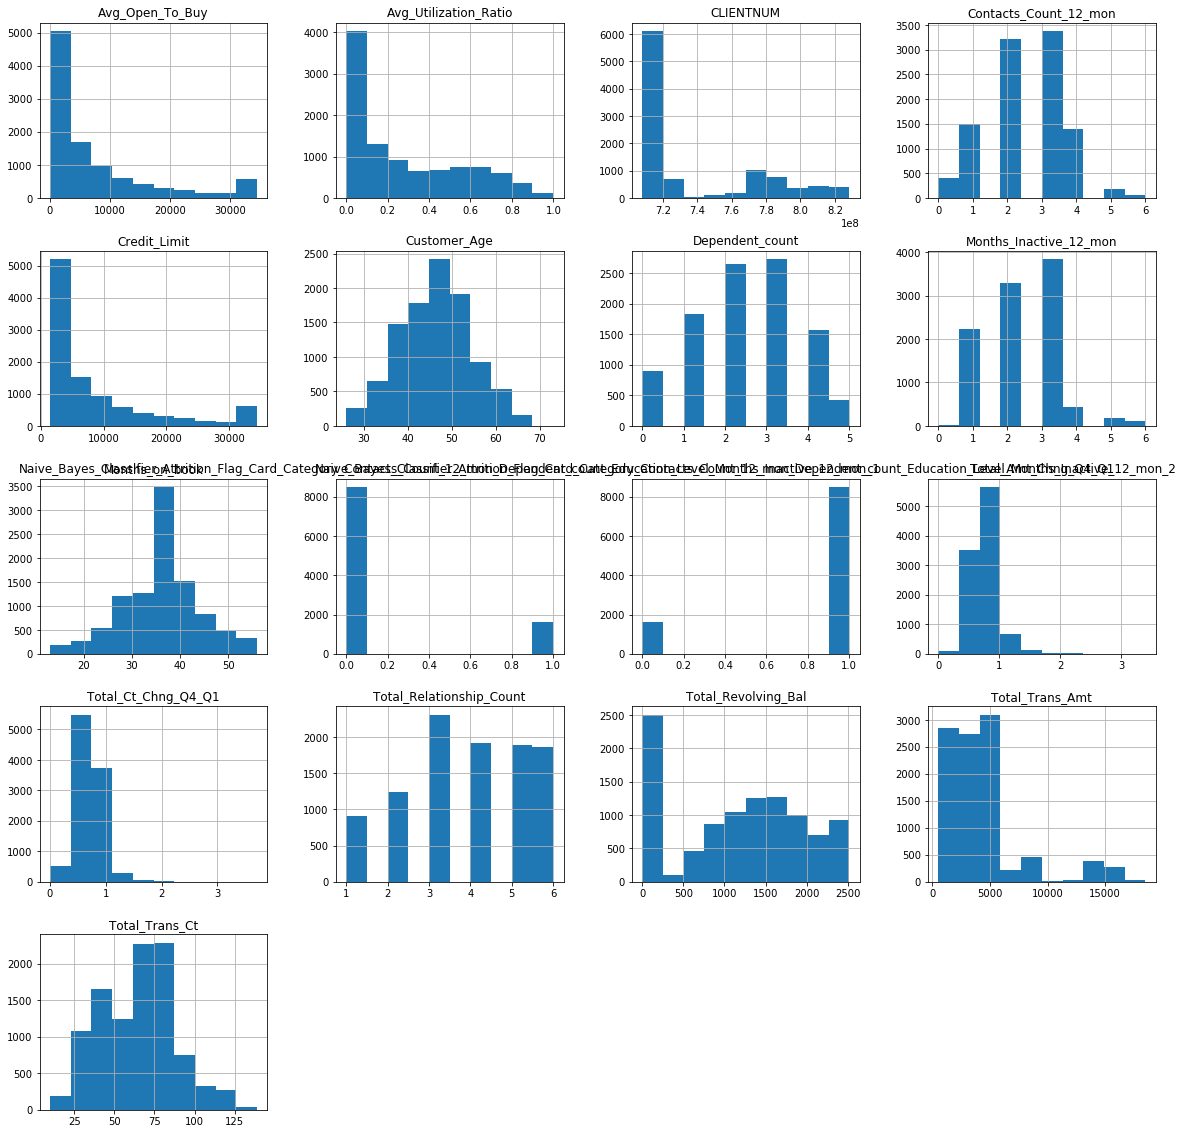

In [29]:
_=df.hist(figsize=(20,20))

In [124]:
# DIVINDING THE COLUMNS ACCORDING TO THE DATA TYPES

num_cols = [col for col in df.columns if df[col].dtypes != "O"]
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
discreate_cols = [col for col in num_cols if df[col].nunique()<25]
print(len(num_cols))
print(len(cat_cols))
print(len(discreate_cols))

17
6
4


In [125]:
### checkin the nunique values of discreate columns
print("DISCRETE COLUMNS+++++++++++" ,"\n\n")
for col in discreate_cols:
    uni = df[col].unique()
    print(col,uni,"\n\n")

#### checking the unique values of categorial columns
print("cat columns COLUMNS_++++++++++++++++++++++ ","\n\n")
for col in cat_cols:
    uni = df[col].nunique()
    print(col,uni,"\n")

DISCRETE COLUMNS+++++++++++ 


Dependent_count [3 5 4 2 0 1] 


Total_Relationship_Count [5 6 4 3 2 1] 


Months_Inactive_12_mon [1 4 2 3 6 0 5] 


Contacts_Count_12_mon [3 2 0 1 4 5 6] 


cat columns COLUMNS_++++++++++++++++++++++  


Attrition_Flag 2 

Gender 2 

Education_Level 7 

Marital_Status 4 

Income_Category 6 

Card_Category 4 



In [127]:
##### ENCODING THE CAT COLUMNS:
education = {"Unknown":0,"Uneducated":1,"High School":2,"College":3,"Graduate":4,"Post-Graduate":5,"Doctorate":6}
df["Education_Level"] = df["Education_Level"].map(education)


marital = {"Unknown":0,"Single":1,"Married":2,"Divorced":3}
df["Marital_Status"] = df["Marital_Status"].map(marital)


income = {"Unknown":0,"Less than $40K":1,"$40K - $60K":2,"$60K - $80K":3,"$80K - $120K":4,"$120K +":5}
df["Income_Category"] = df["Income_Category"].map(income)


card = {"Blue":0,"Silver":1,"Gold":2,"Platinum":3}
df["Card_Category"] = df["Card_Category"].map(card)

df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0,"Attrited Customer":1})

df["Gender"] = df["Gender"].map({"M":0,"F":1})

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
x = df.drop(["Dependent_count","CLIENTNUM"],axis=1)
y = df["Dependent_count"]

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve
from xgboost import XGBClassifier,XGBRFClassifier

In [186]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=23)

In [198]:
logit = XGBClassifier()
logit.fit(xtrain,ytrain)

ypred = logit.predict(xtrain)
ypred_proba = logit.predict_proba(xtrain)
print(classification_report(ytrain,ypred))
print(confusion_matrix(ytrain,ypred))
print(roc_auc_score(ytrain,ypred_proba,multi_class='ovr'))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       678
           1       1.00      1.00      1.00      1387
           2       0.99      0.99      0.99      1983
           3       0.98      1.00      0.99      2101
           4       1.00      0.98      0.99      1134
           5       1.00      0.98      0.99       312

    accuracy                           0.99      7595
   macro avg       0.99      0.99      0.99      7595
weighted avg       0.99      0.99      0.99      7595

[[ 678    0    0    0    0    0]
 [   0 1381    2    4    0    0]
 [   0    0 1966   14    3    0]
 [   0    0    3 2098    0    0]
 [   0    1   

In [ ]:
ypred = logit.predict(xtrai)
ypred_proba = logit.predict_proba(xtrain)
print(classification_report(ytrain,ypred))
print(confusion_matrix(ytrain,ypred))
print(roc_auc_score(ytrain,ypred_proba,multi_class='ovr')

### Oversampling

In [182]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss

In [187]:
os = RandomOverSampler()
xtrain_os,ytrain_os = os.fit_sample(xtrain,ytrain)

In [199]:
logit = XGBClassifier()
logit.fit(xtrain_os,ytrain_os)

ypred = logit.predict(xtrain)
ypred_proba = logit.predict_proba(xtrain)
print(classification_report(ytrain,ypred))
print(confusion_matrix(ytrain,ypred))
print(roc_auc_score(ytrain,ypred_proba,multi_class='ovr'))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       678
           1       1.00      0.99      1.00      1387
           2       0.99      0.99      0.99      1983
           3       0.99      0.99      0.99      2101
           4       0.98      0.99      0.99      1134
           5       0.97      1.00      0.98       312

    accuracy                           0.99      7595
   macro avg       0.99      0.99      0.99      7595
weighted avg       0.99      0.99      0.99      7595

[[ 678    0    0    0    0    0]
 [   0 1377    1    7    1    1]
 [   0    1 1959   13    9    1]
 [   0    0    5 2081    8    7]
 [   0    0   

In [200]:
ypred = logit.predict(xtest)
ypred_proba = logit.predict_proba(xtest)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(roc_auc_score(ytest,ypred_proba,multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       226
           1       0.84      0.80      0.82       451
           2       0.82      0.83      0.83       672
           3       0.72      0.82      0.77       631
           4       0.72      0.69      0.70       440
           5       0.32      0.20      0.24       112

    accuracy                           0.76      2532
   macro avg       0.71      0.69      0.69      2532
weighted avg       0.76      0.76      0.76      2532

[[177  24   9  12   3   1]
 [ 23 359  27  28  11   3]
 [ 14  19 555  46  32   6]
 [  0  16  32 520  45  18]
 [  0   8  35  76 302  19]
 [  0   3  15  44  28  22]]
0.918613372709578
